<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/31_TS_Pandas_Time_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
files.upload()

Saving starbucks.csv to starbucks.csv


{'starbucks.csv': b'Date,Close,Volume\n2015-01-02,38.0061,6906098\n2015-01-05,37.2781,11623796\n2015-01-06,36.9748,7664340\n2015-01-07,37.8848,9732554\n2015-01-08,38.4961,13170548\n2015-01-09,37.2361,27556706\n2015-01-12,37.4415,10021486\n2015-01-13,37.7401,11040702\n2015-01-14,37.5301,9295084\n2015-01-15,37.1381,8126602\n2015-01-16,37.6188,9015502\n2015-01-20,37.9058,10738304\n2015-01-21,37.9361,10844182\n2015-01-22,38.6128,23913056\n2015-01-23,41.1702,38107194\n2015-01-26,41.1235,14098574\n2015-01-27,41.2262,10995808\n2015-01-28,40.8645,11963202\n2015-01-29,41.5575,12475860\n2015-01-30,40.8482,10070456\n2015-02-02,41.0629,13638832\n2015-02-03,41.4469,9252426\n2015-02-04,41.5453,11496698\n2015-02-05,41.9856,7598672\n2015-02-06,41.6858,7835332\n2015-02-09,41.6015,6911614\n2015-02-10,42.7069,12469500\n2015-02-11,42.5242,6466910\n2015-02-12,43.009,7197558\n2015-02-13,42.8942,6109522\n2015-02-17,43.105,6386900\n2015-02-18,43.5593,6541986\n2015-02-19,43.639,6109176\n2015-02-20,43.7982,6462

In [5]:
df = pd.read_csv('starbucks.csv', index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 63.6+ KB


In [7]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [8]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [9]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [10]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [17]:
def first_day(entry):
  if len(entry):
    return entry[0]

In [18]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


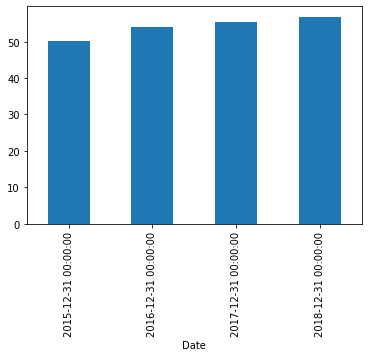

In [26]:
df['Close'].resample('A').mean().plot.bar()

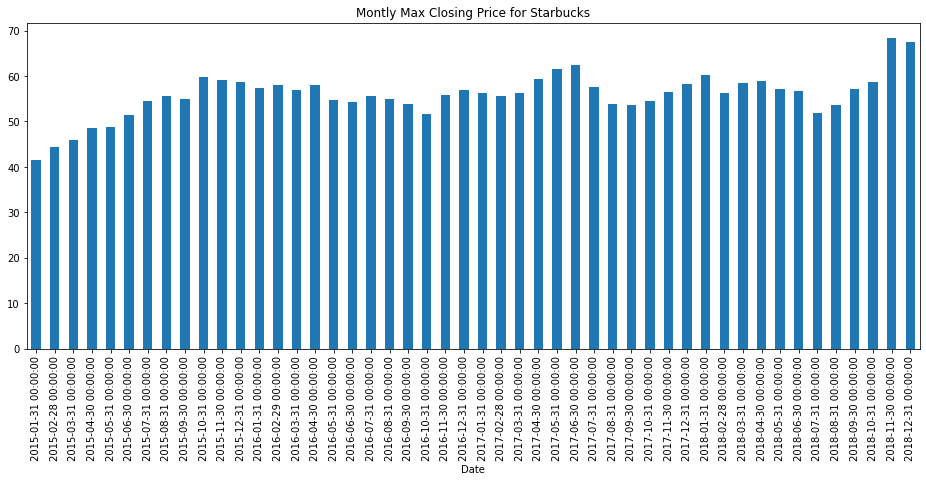

In [27]:
title = 'Montly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16, 6), title=title, color='#1f77b4')